<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Филипп, доброго дня! рад приветствовать тебя) <br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

# Проект: отток  клиентов из банка

Из банка стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
В рамках проекта нужно:

- Построить модель с предельно большим значением F1-меры (min 0.59). Чтобы сдать проект успешно, нужно довести метрику до 0.59.
- Проверить F1-меру на тестовой выборке самостоятельно.
- Измеряйте AUC-ROC и сравнивайть её значение с F1-мерой.


1. [Загрузка и подготовка данных](#openning)
    - [Импортиртирование библиотек и выгрузка данных](#import)
    - [Ознакомление с данными и предобработку](#data)
    - [Разделение на выборки](#separating)

2. [Исследование баланса классов и обучение моделей](#researching)

      - [Изучение дисбаланса классов](#classes)
      - [Обучение без учета дисбаланса](#disbalanced)
 
           -[LogisticRegression](#regressoin) 
      
           -[DecisionTreeClassifier](#tree)
      
           -[RandomForestClassifier](#forest)

      - [Обучение с учетом дисбаланса](#balanced)

           -[LogisticRegression](#regressoin_b) 
      
           -[DecisionTreeClassifier](#tree_b)
      
           -[RandomForestClassifier](#forest_b)


3. [Финальное тестирование](#tests)

4. [Вывод](#conclusion)

[Чек-лист](#check)

<div style="border:solid blue 2px; padding: 20px"> 
<h1 style="color:blue; margin-bottom:20px">Шаг 1. Загрузка и подготовка данных</h1>

На данном этапе необходимо: 
- [импортировать необходимые библиотеки и выгрузить данные](#import)
- [ознакомиться с данными и выполнить предобработку](#data)
- [разделить данные на выборки](#separating)
<a id="openning"></a>
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 1.1  Импорт бибилиотек и выгрука данных</h3>
<a id="import"></a>
</div>

In [1]:
#pip install seaborn==0.11.0

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt # Импортировали библиотеки пандас, матплотлиб, сиаборн

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Импортировали все модули для классификации

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression # регрессии импортировал на будущее, пусть будут в одном месте

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
#from sklearn.metrics import plot_roc_curve
from sklearn import metrics, model_selection
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score # и импортировали функции для расчета метрик (mean_squared_error тут чтобы не искать)

from sklearn.dummy import DummyClassifier # Этим будем тестировать адекватность модели

In [4]:
data_sourse = 'Project2_Bank_client_churn.csv' # Подставьте сюда свой csv, я у себя его переименовал
#data_sourse = '/datasets/Churn.csv'

data = pd.read_csv(data_sourse) # Импортировали данные пользователей

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 1.2  Ознакомление с данными и предобработка</h3>
<a id="data"></a>
</div>

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


 <div style="border:solid grey 1px; padding: 20px"> 
В датасете сразу видны признаки, которые нам явно не понадобятся для обучения: RowNumber, CustomerId, Surname. Если вдруг окажется, что люди с фамилией Петров чаще уходят, это , конечно, интересно, но врят ли фамилия реально влияет на вероятность ухода. Также сомнительным выглядит признак с полом, но все-таки его убирать не станем.

Данные пока выглядят чистыми, форматы корректны, пропусков почти нет. Есть один признак, с которым нужно поработать: Tenure, почти тысяча пропуско и формат должен быть бы int.
Сделаем допущение, что все пропуски образовались из-за того, что все люди, у кого нет имущства не заполнили нужное поле.
</div>

In [7]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis = 1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>:)<br>
    
C дропом - абсолютно согласен)

In [8]:
data['Tenure']=data['Tenure'].fillna(0)
data['Tenure'] = data['Tenure'].astype('int')

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>
решение понятно, но обоснования ему нет(((( Почему именно так решил заполнить? как это повлияет на результат моделирования? <br>
<br> Возможно, что групповая (например по географии) медиана также не принесла бы большой ошибки. А может взять и удалить, чтобы не "искушаться"..Тут понятно, что однозначного решения нет, как и алгоритма. Правило только одно (как в медицине) - НЕ нарведи. Т.е. принимаемое решение должно соотноситься с возможным ущербом на конечный результат. В нашем случае ущерб от медианного заполнения ниже от ущерба удалить данные?. Причём выше/ниже - это только на чуйке/жизенном опыте смого аналитика.<br>
Интересная это работа - быть DS-аналитиком)<br><br>
    
В данном случае, спарведливости ради, если построить распределение ДО и ПОСЛЕ заполнения пропусков, то увидим, что оно изменится. Т.е. данный подход несколько исказит инфо, а значит и результат моделирования будет уже не очень.<br> Тут лучшим способом будет - заполнение случайным числом.<br>
    
Ещё вараинт:<br> удалить пропущенные строки. А по окнчании построения модели, вывести важность факторов самой модели. И если фактор tenure окажется не значим, то как в принципе удалить его из моделирования, а первоначально удалённые строки - вернуть.

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,4.543,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,3.112,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,2.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,4.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


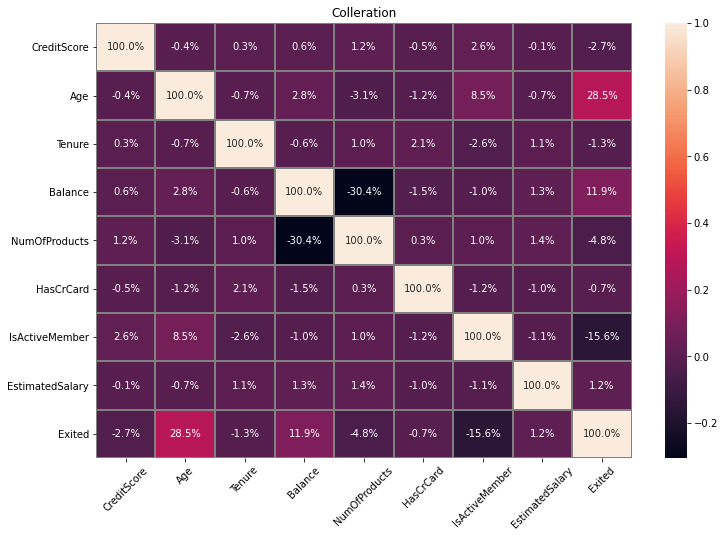

In [10]:
plt.figure(figsize = (12,8))
plt.title('Colleration')
sns.heatmap(data.corr(), annot = True, fmt='.1%', linewidths=1, linecolor='grey')
plt.xticks(rotation = 45)
plt.show()

 <div style="border:solid grey 1px; padding: 20px"> 
Интересно, что признаков с которыми заметно кореллирует признак Exited всего и 3 и зависимость не очень сильная. Корелляция 28,5% с показателем возраста (может быть чем старше люди тем чаще они меняют банки, хотя это кажется сомнительным люди в возрасте обычно более консервативны, можеть дело в более высокой смертности, 11,9% зависимость с балансом, связь не очень сильная, но может быть связана с тем, что люди с большими накоплениями более требовательны к сервисам банка и более погружены в финансовую сферую, ну и отрицательная связь 15,6% с признаком "IsActiveMember", ну тут более менее понятно, чем менее активен пользватель, тем больше вероятность его ухода.

Интересно еще одно наблюдеие, наиболее сильная взаимосвязь между числом продуктов и балансом, причес связь отрицательная, то есть чем больше баланс, тем меньше продуктов он использует. Это необычно. Отрицательная корелляция составляет 30,4%
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>
ВАЖНО!!! по использованию корреляций<br>
0) Этот инструмент - исключительно для данных в количественной шкале!!!!<br>
Т.е. Exited и Вораст - корреляцию не посмотреть. Т.к. Одна величина - номинальная (в виде 0 и 1, т.е. да/нет можно сказать), другая количественная. Поэтому для таких ситуаций подойдёт другая техника - сравнение групп (из темы "проверка гипотез" спринт 13 будет).<br><br>
1) Наряду с силой связи, есть ещё характертеристика уровня значимости. Т.е. на сколько выявленной связи можно доверять (это теория р-уровня значений. Ещё будете изучать. Советую (если не очень пока знаете что это) попытать наставника по этому вопросу) <br>

2) Данные имеют склонность быть нормальными и ненормальными (вот ёлки, всё как у людей:)))<br>
Этот факт важен при использовании расчётов коэффициента корреляции:<br>
Если данные нормальные - используют критерий Пирсона. если ненормальный - критерий Спирмена)<br>  
Есть ли последствия от "ложного" использования методов? Да - ложные управленческие выводы!!!!   <br><br>
3) И ещё: корреляция - очень подвержена выбросам!!! Если в данных они есть - вывод буде ложны <br>
4) Так же, очень важно соблюдать однородность выборки.  Если прорустить этот момент, то вывод может быть ложным<br>
5) Возможно, что на разных участках - разная зависимоость. Тут важно, вместе с расчётами выводить график. И вместе всё глядеть.
<br>
    
<font color='green'>
Поэтому к данной матрице я бы пока сдержанно отнёсся)<br>
Вот, например, сслучаи ложной корреляции (вторые три картинки):. "ВЫБРОСЫ": линия (по ней считается корреляция) смещена к отдельной точке, а должна проходить по скоплению точек. Отсюда имеем заниженный к-т корреляции.

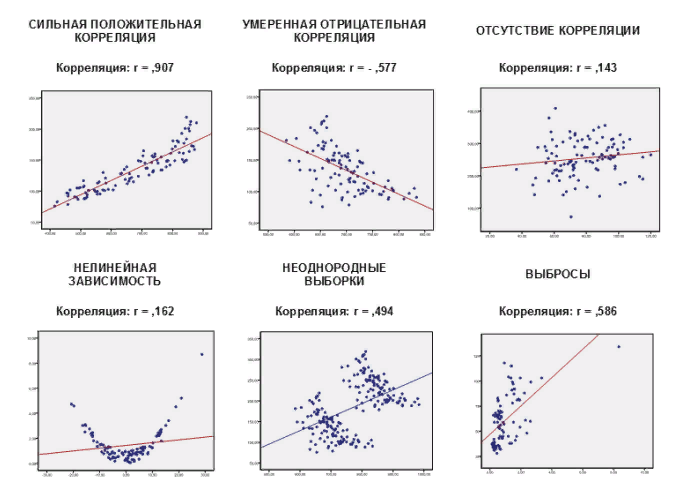

In [11]:
# Напишем функцию, которая будет рисовать нам графики распределения значений и боксплоты
def kde_box(dataframe, column, hues): # В аргументы передаем датафрейм, колонку и столбец детализации
    plt.figure(figsize = (16,8)) # по всем данным вместе и отдельно в разрезе пользователей тарифов

    ax1 = plt.subplot(2,2,1) # гистограмма распределния с детализацией категории
    sns.histplot(data=dataframe, x=column,kde=True, hue=hues)
    plt.title('Hist-KDE plot of '+column+' devided by '+hues)

    ax2 = plt.subplot(2,2,2) # гистограмма распределния без детализации категории
    sns.histplot(data=dataframe, x=column,kde=True)
    plt.title('Hist-KDE plot of '+column)
    
    ax3 = plt.subplot(2,2,3) # боксплот с детализацией категории
    sns.boxplot(data = dataframe, x = hues,  y = column)
    plt.title('Boxplot of '+column)
    
    ax4 = plt.subplot(2,2,4) # боксплот распределния без детализации категории
    sns.boxplot(data = dataframe, y = column)
    plt.title('Boxplot of '+column)
    
    plt.subplots_adjust(right = 1, hspace = 0.3)
    plt.suptitle('Data distribution of '+ column)
    plt.show()

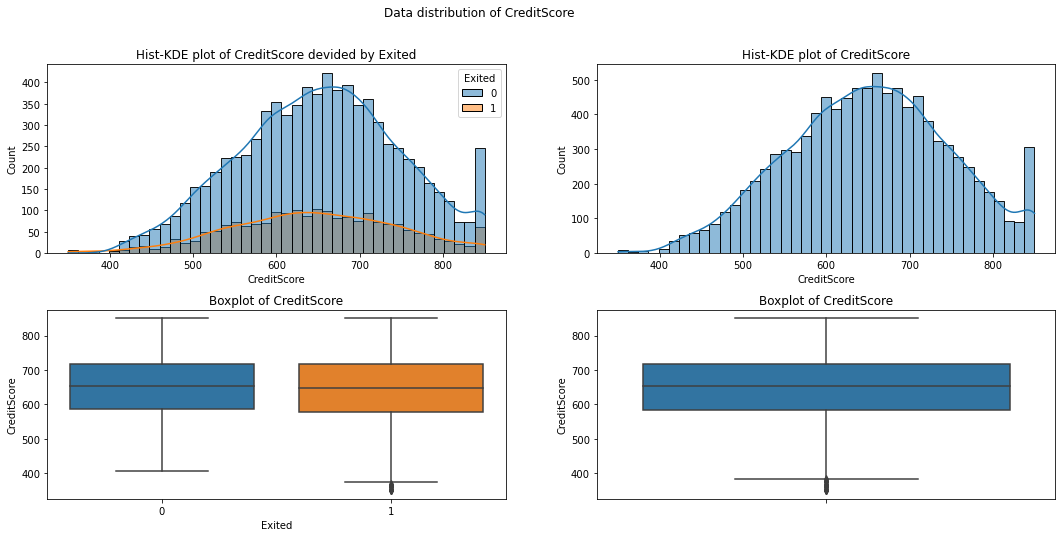

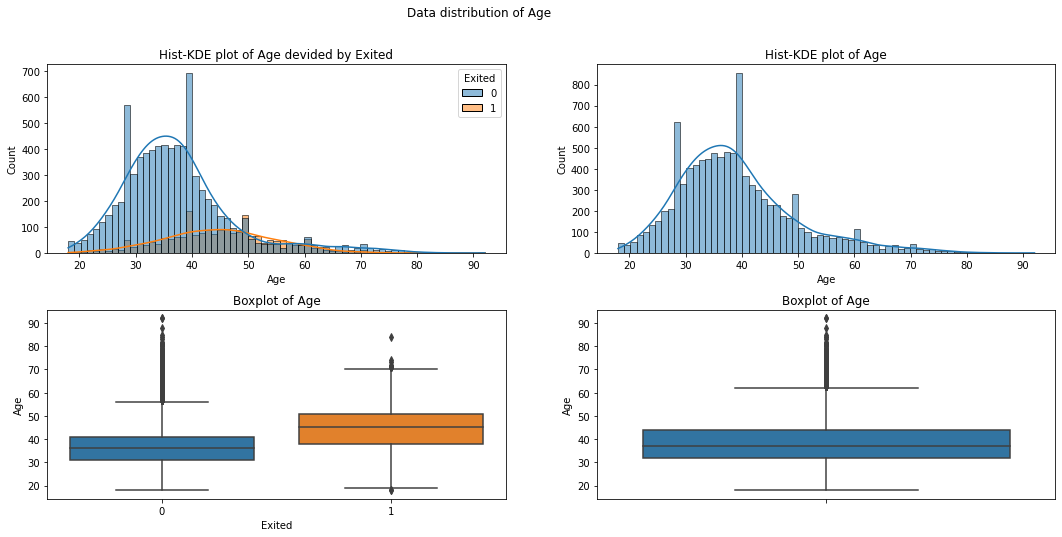

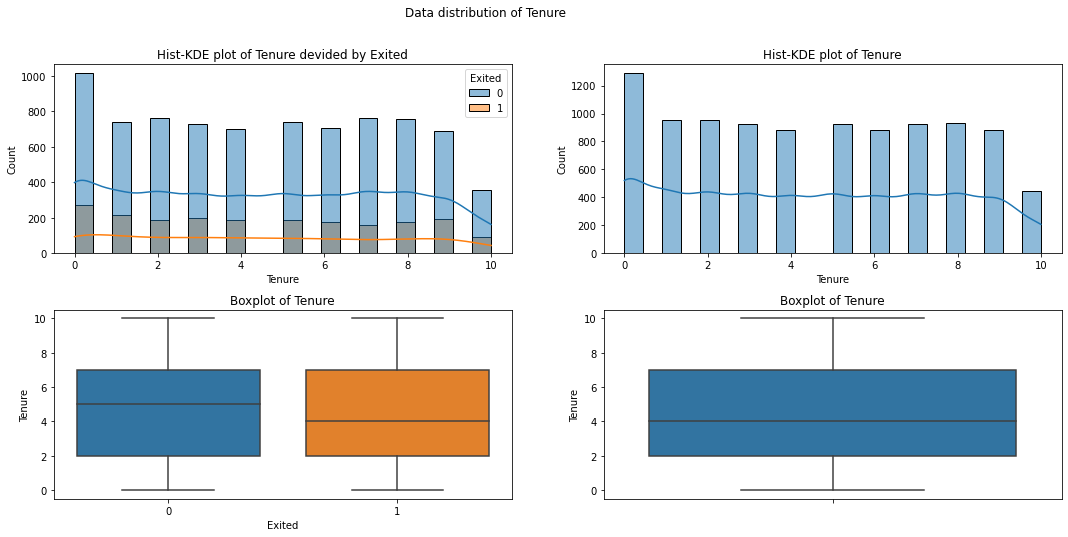

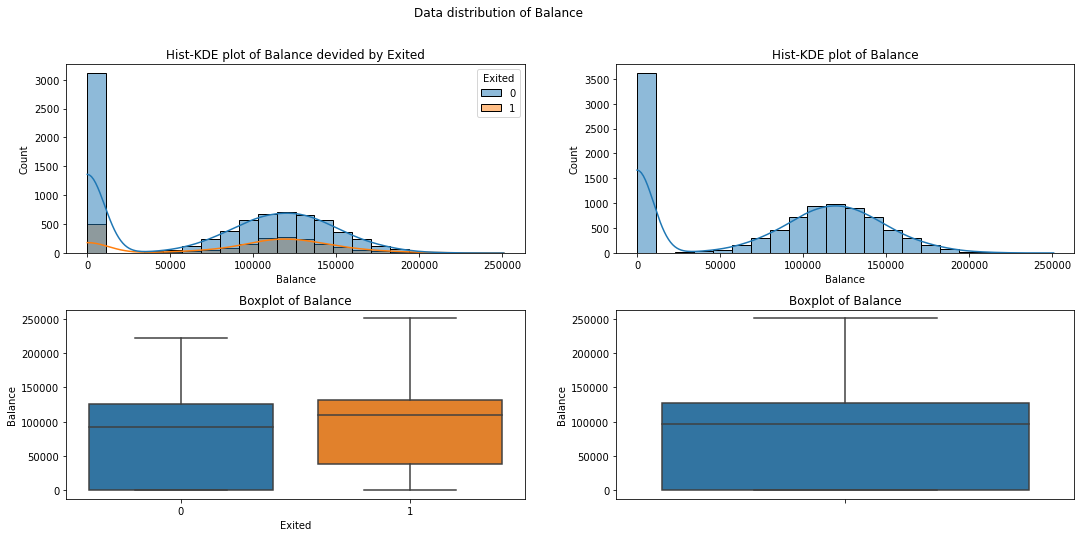

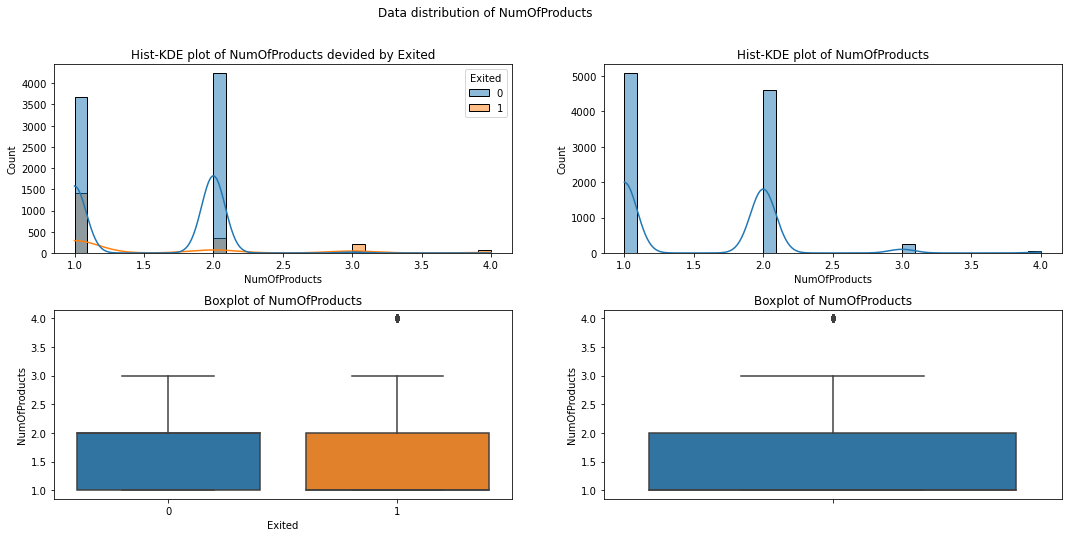

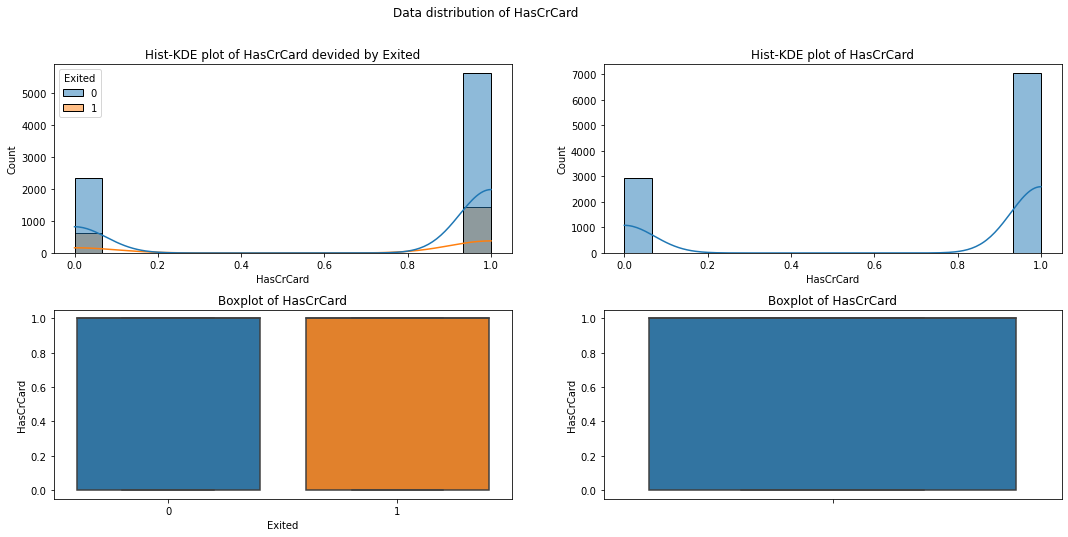

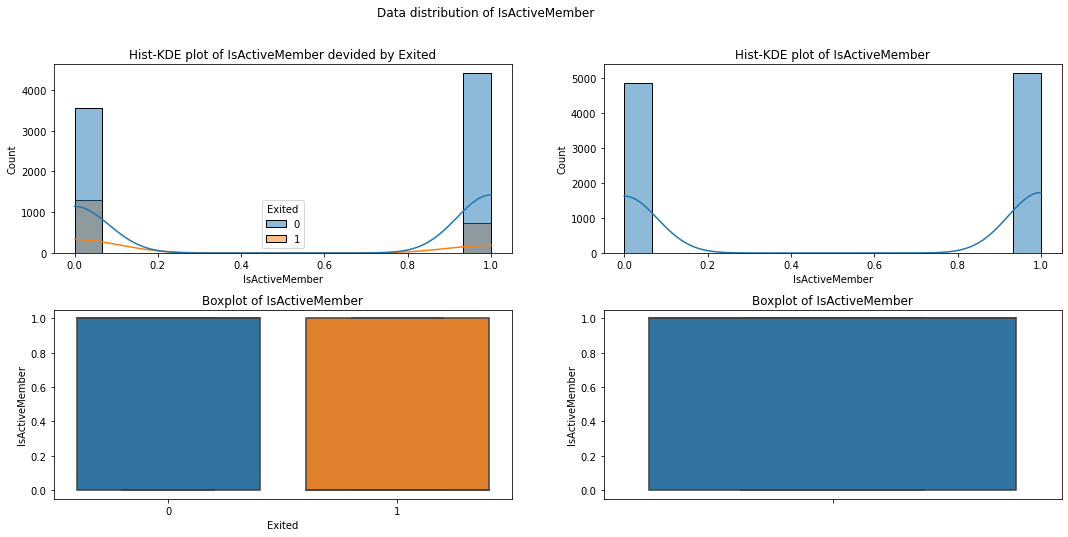

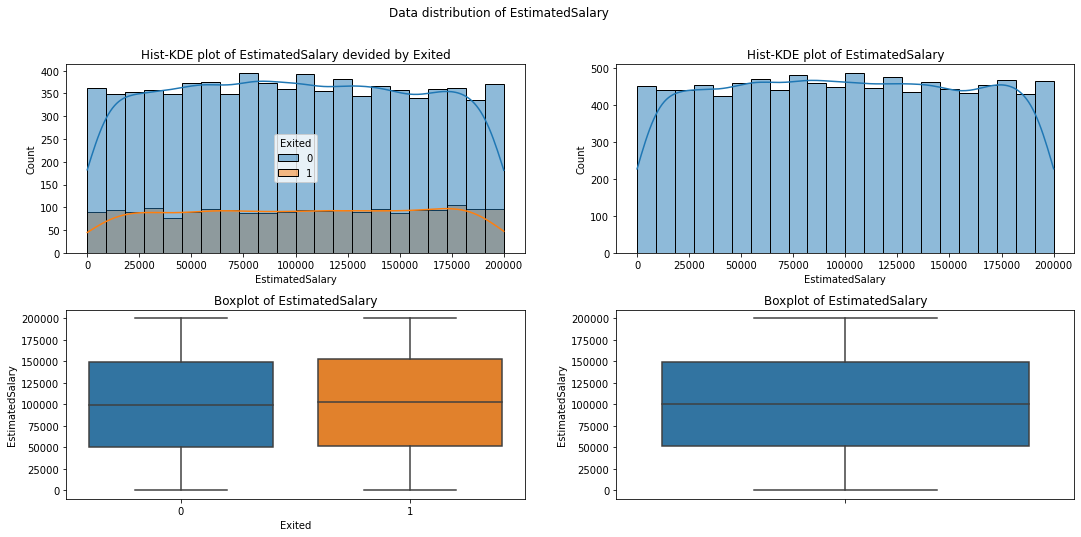

In [12]:
 #через цикл отрисуем графики по всем признакам
for col in data.drop('Exited', axis=1).columns.tolist():
    if data[col].dtype == 'object':
        continue
    else:
        kde_box(data, col, 'Exited')

 <div style="border:solid grey 1px; padding: 20px"> 
Распределение данных дает нам понять, что сами данные врят ли очень реальные. Все данные распределены примерно одинаково в разрезе классов. Например, видно, что запрлаты тех, кто ушел такие-же как и тех, кто остался. Причем данные по зарплатам распределены в принципе странно,  данные распределены не нормально, а одинаково. Людей, кто получает условно низкую, высокую или среднюю зарплату одинаковое количество, видимо данные сформированы так специально.

Единственный параметр, который ярко отличается в разрезе ушедших и оставшихся клиентов - это возраст. Это мы тоже увидели на тепловом графике.
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>Ни что не скроется от профессионального взгляда)<br>
ОК) (жаль рисунки запустил... библиотека, видимо не стыкуется) Но увидел графики)

In [13]:
#Напишем функцию, которая будет рисовать нам гистограммы
# по всем данным вместе, и отдельно в разрезе пользователей тарифов
def count_plot(dataframe, column, hues): 
    plt.figure(figsize = (12,8)) 

    ax1 = plt.subplot(1,2,1) # гистограмма в разрезе категории
    sns.countplot(data=dataframe, y=column, hue=hues)
    plt.title('Countplot plot of '+column+' devided by '+hues)

    ax2 = plt.subplot(1,2,2)# гистограмма без разреза категории
    sns.histplot(data=dataframe, y=column)
    plt.title('Countplot plot of '+column)
    
  
    plt.subplots_adjust(right = 1, hspace = 0.3)
    plt.suptitle('Countplots plot of '+ column)
    plt.show()

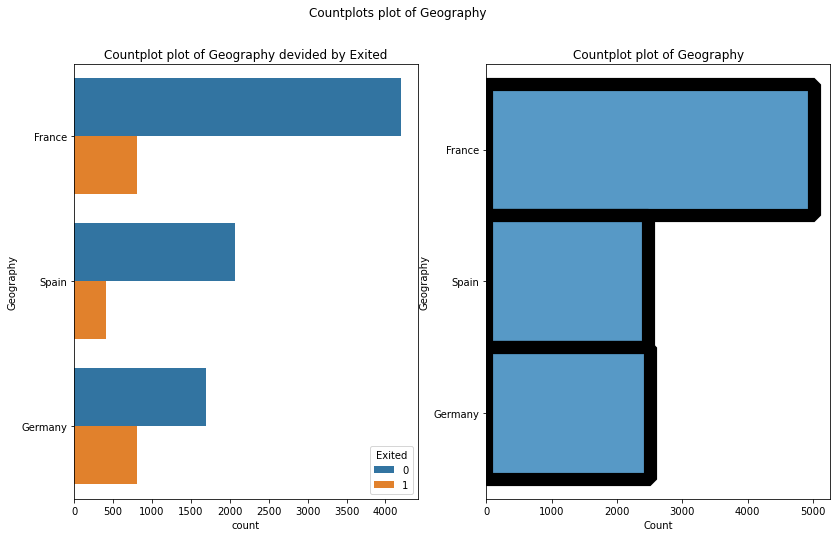

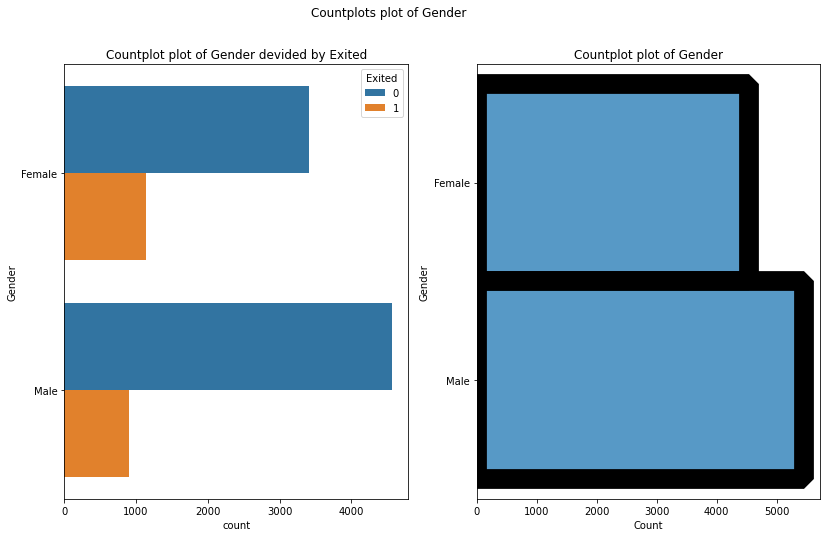

In [14]:
for col in data.drop('Exited', axis=1).columns.tolist():
    if data[col].dtype != 'object':
        continue
    else:
        count_plot(data, col, 'Exited')

 <div style="border:solid grey 1px; padding: 20px"> 
Из расрределения по категориальным признакам видно, что в Германии меньше всего клиентов банка, однако отток в процентном соотношении там самы сильный. Аналогиченая ситуация и с полом клиента, клиентов-женщин меньше и уходят они чаще
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 1.3  Разделение на выборки</h3>
<a id="separating"></a>
</div>

In [15]:
numeric = [] #добавим в всписок все не категорийные признаки, сделаем это до прямого кодирования, когда все превратится в числа

for col in data.drop('Exited', axis=1).columns.tolist(): # Циклом переберем все столбцы, и оставим те
    if data[col].dtype != 'object': #   , где ти не object
        numeric.append(col)
numeric

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [16]:
data = pd.get_dummies(data, drop_first = True) # Кодируем методом One-Hot Encoding

In [17]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>отлично, и не забыл удалить лишние столбцы)

In [16]:
features = data.drop('Exited', axis = 1) # Разделили признаки на обычные и целевой
target = data['Exited']

In [17]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features, target, test_size = 0.2, random_state = 12345, stratify=target) 
# взяли 20% данных в валидационную выборку, сделали стратификацю, чтобы классы распределились также как в исходном датасете

In [18]:
features_train, features_test, target_train, target_test = \
train_test_split(features_train, target_train, test_size = 0.25, random_state = 12345,stratify=target_train) 
# и 20% в тестовую и сделали стратификацю

In [19]:
data_list = [features_train, features_valid, features_test]
for data_set in data_list:
    percent = data_set.shape[0]/data.shape[0]
    objects = data_set.shape[0]
    signs = data_set.shape[1]
    print('Количество объектов в выборке составляет {},доля от общей выборки составляет {:.2%} количество признаков {}.'\
          .format(objects,percent, signs))
# проверим, что выборки 60-20-20

Количество объектов в выборке составляет 6000,доля от общей выборки составляет 60.00% количество признаков 11.
Количество объектов в выборке составляет 2000,доля от общей выборки составляет 20.00% количество признаков 11.
Количество объектов в выборке составляет 2000,доля от общей выборки составляет 20.00% количество признаков 11.


 <div style="border:solid grey 1px; padding: 20px"> 
<h3 style="color:grey; margin-bottom:20px">Шаг 1. Вывод </h3>
Данные чистые, пропусков было мало и было легко понять природу их возникновения и заполнить их. Неадекватных показателей также нет, также как и выбросов. Наоборот данные слишком чистые, так данные по зарплатам распределены "прямоугольником", людей получающих средную, низкую и высокую зарплату одинаковое количество. Все данные распределены примерно одинаково в разрезе классов. Из расрределения по категориальным признакам видно, что в Германии меньше всего клиентов банка, однако отток в процентном соотношении там самы сильный. Аналогиченая ситуация и с полом клиента, клиентов-женщин меньше и уходят они чаще
    
3 признака заметно кореллируют с Exited: Age(28,5%), Balance(11,9%), IsActiveMember(-15,6%).

При разделении данных на тренировочную, валидационную и тестову выборки датасет был разделен в пропорции 60%-20%-20%, данные стратифицировали, чтобы классы распределились по выборкам в одинаковой проипорции. Также применили метод One-Hot Encoding для категориальных признаков, которые были записаны словамию
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h1 style="color:blue; margin-bottom:20px">Шаг 2. Исследование баланса классов и обучение моделей</h1>

На данном этапе необходимо: 
 - [Изучение дисбаланса классов](#classes)
 - [Обучение без учета дисбаланса](#disbalanced)
 
      -[LogisticRegression](#regressoin) 
      
      -[DecisionTreeClassifier](#tree)
      
      -[RandomForestClassifier](#forest)

- [Обучение с учетом дисбаланса](#balanced)

     -[LogisticRegression](#regressoin_b) 
      
     -[DecisionTreeClassifier](#tree_b)
      
     -[RandomForestClassifier](#forest_b)

</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 2.1  Изучение дисбаланса классов</h3>
<a id="classes"></a>
</div>

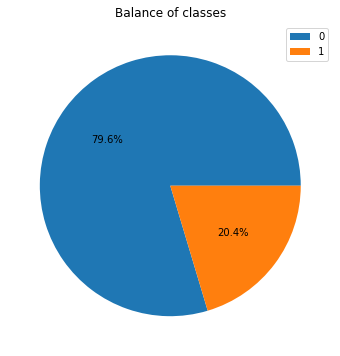

In [20]:
#создали фрейм с количеством каждого класса в процентах
pie = data['Exited'].value_counts(normalize = True).to_frame().reset_index() 

# Отрисуем круговую диаграмму, чтобы изучить распределение классов

plt.figure(figsize = (6,6))
plt.pie(pie['Exited'], autopct = '%0.1f%%')
plt.title('Balance of classes')
plt.legend(pie['index'])
plt.show()

In [21]:
# создали фреймы с количеством каждого класса в процентах для каждой выборки
exited_train = target_train.value_counts().to_frame().reset_index() #normalize = True
exited_valid = target_valid.value_counts().to_frame().reset_index()
exited_test = target_test.value_counts().to_frame().reset_index()

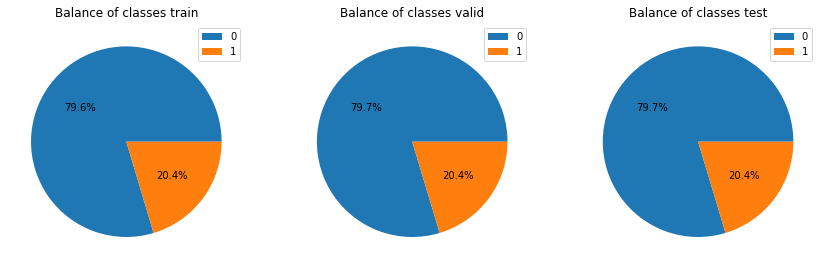

In [22]:
# отрисуем 3 круговые диаграммы с распределением классов внутри выборок
plt.figure(figsize=(6, 6))

plt.subplot(1,3,1)
plt.pie(exited_train['Exited'], autopct = '%0.1f%%')
#plt.axis('equal')
plt.title('Balance of classes train')
plt.legend(exited_train['index'])

plt.subplot(1,3,2)
plt.pie(exited_valid['Exited'], autopct = '%0.1f%%')
#plt.axis('equal')
plt.title('Balance of classes valid')
plt.legend(exited_valid['index'])

plt.subplot(1,3,3)
plt.pie(exited_test['Exited'], autopct = '%0.1f%%')
#plt.axis('equal')
plt.title('Balance of classes test')
plt.legend(exited_test['index'])

plt.subplots_adjust(right = 2)
plt.show()

 <div style="border:solid grey 1px; padding: 20px"> 
С помощью круговых диаграмм посмотрели распределение классов. Соотношение составляет 1:4, что является вполне себе серьезным дисбалансом классов. Также стоит отметить, что классы внутри всех выборок распределены одинаков, это благодаря тому, что мы применили стратификацию при разделении исходного датасета.
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 2.2  Обучение без учета дисбаланса</h3>
<a id="disbalanced"></a>
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.2.1  LogisticRegression</h4>
<a id="regressoin"></a>
</div>

In [23]:
# стандартизация данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
model = LogisticRegression(random_state = 12345)  # Обучили Логистическую регрессию
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)  # делаем прогноз

print('Полнота:{:.3f}'.format(recall_score(target_valid, predicted_valid))) # рассчтитали метрики
print('Точность:{:.3f}'.format(precision_score(target_valid, predicted_valid)))
print('f1_score:{:.3f}'.format(f1_score(target_valid, predicted_valid)))


probability_valid = model.predict_proba(features_valid) # делаем прогноз
probability_valid_one = probability_valid[:,1]  # считаем вероятности
ap = average_precision_score(target_valid, probability_valid_one) # рассчитали Average precision score
auc_roc = roc_auc_score(target_valid, probability_valid_one) # рассчитали auc_roc
print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))
print('Медианная вероятность класса 1: {:.3f}'.format(np.median(probability_valid_one)))  
 # рассчитали медианную вероятность, чтобы знать в какомо диапазоне примерно перебирать вероятности для улучшения модели


Полнота:0.197
Точность:0.625
f1_score:0.299

Общие показатели модели
Auc-Roc: 0.774, Average precision score: 0.467
Медианная вероятность класса 1: 0.163


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


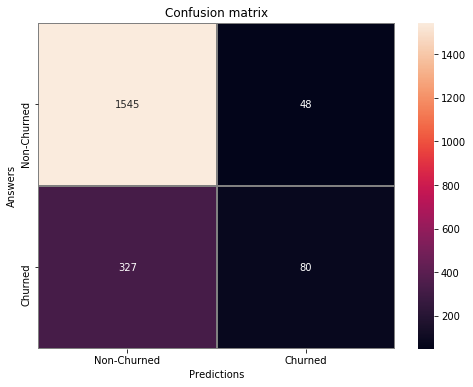

In [25]:
plt.figure(figsize = (8,6)) # построим матрицу ошибок
ax = plt.subplot()
sns.heatmap(confusion_matrix(target_valid, predicted_valid), annot = True,fmt= '.0f', linewidths=1, linecolor='grey')
ax.set_xticklabels(['Non-Churned', 'Churned'])
ax.set_yticklabels(['Non-Churned', 'Churned'])
plt.xlabel('Predictions')
plt.ylabel('Answers')
plt.title('Confusion matrix')
plt.show()

 <div style="border:solid grey 1px; padding: 20px"> 
Обучили модель логистической регрессии, без перебора трешхолда. Результаты получились не очень, f1 ниже 0.3. Медиана вероятностей  класса 1 - 16%, нужно перебирать вероятности где-то в этом диапазоне для улучшения модели. Показатель Auc-Roc: 0.775 и Average precision score: 0.467, тоже невысокие
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>Не боец - логистическая)

In [26]:
best_predicted_valid = 0  # созадим переменные для лучших показателей
best_f1 = 0
best_precision = 0
best_recall = 0
best_threshold = 0
for threshold in np.arange(0.1, 0.6, 0.05):  # перебираем трешхолды
    predicted_valid = probability_valid_one>threshold  # делаем ручной прогноз
    precision = precision_score(target_valid, predicted_valid)  # считаем метрики
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:  # если Ф1 превысилила предыдущий максимальный показател, то сохраняем все метрики в переменные
        best_predicted_valid = predicted_valid
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}".format(threshold, precision, recall, f1))
ap = average_precision_score(target_valid, probability_valid_one)  #  считаем Average precision score
auc_roc = roc_auc_score(target_valid, probability_valid_one) # рассчитали auc_roc
print()
print('Лучшие показатели')
print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_threshold, best_precision, best_recall, best_f1))
print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))

Порог = 0.10 | Точность = 0.268, Полнота = 0.921, f1_score = 0.416
Порог = 0.15 | Точность = 0.315, Полнота = 0.823, f1_score = 0.455
Порог = 0.20 | Точность = 0.369, Полнота = 0.732, f1_score = 0.491
Порог = 0.25 | Точность = 0.424, Полнота = 0.634, f1_score = 0.508
Порог = 0.30 | Точность = 0.477, Полнота = 0.506, f1_score = 0.491
Порог = 0.35 | Точность = 0.536, Полнота = 0.418, f1_score = 0.470
Порог = 0.40 | Точность = 0.562, Полнота = 0.332, f1_score = 0.417
Порог = 0.45 | Точность = 0.581, Полнота = 0.256, f1_score = 0.355
Порог = 0.50 | Точность = 0.625, Полнота = 0.197, f1_score = 0.299
Порог = 0.55 | Точность = 0.626, Полнота = 0.140, f1_score = 0.229

Лучшие показатели
Порог = 0.25 | Точность = 0.424, Полнота = 0.634, f1_score = 0.508, 

Общие показатели модели
Auc-Roc: 0.774, Average precision score: 0.467


In [27]:
# напишем функцию  матрицы ошибок, чтобы не загромождать все кодом в будущем
def conf_mat(answers, predictions, classes): # аргументы: целевой показатель, предсказания, классы
    plt.figure(figsize = (8,6))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(answers, predictions), annot = True,fmt= '.0f', linewidths=1, linecolor='grey')
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    plt.xlabel('Predictions')
    plt.ylabel('Answers')
    plt.title('Confusion matrix')
    plt.show()

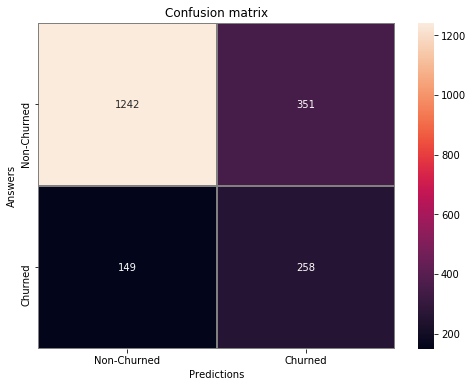

In [28]:
conf_mat(target_valid, best_predicted_valid, ['Non-Churned', 'Churned'])

In [29]:
# напишем функцию  для графиков ROC-кривой и  Precision-Recall, чтобы не загромождать все кодом в будущем
def curve_graphs(answers, probability): # аргументы: целевой показатель и вероятности predict_proba

    plt.figure(figsize=(6, 6))

    fpr, tpr, thresholds = roc_curve(answers, probability) # считаем  метрики с разным трешходом
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')

    precision, recall, thresholds = precision_recall_curve(answers, probability) # считаем  метрики с разным трешходом
    plt.subplot(1,2,2)
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')

    plt.subplots_adjust(right = 2)
    plt.show()

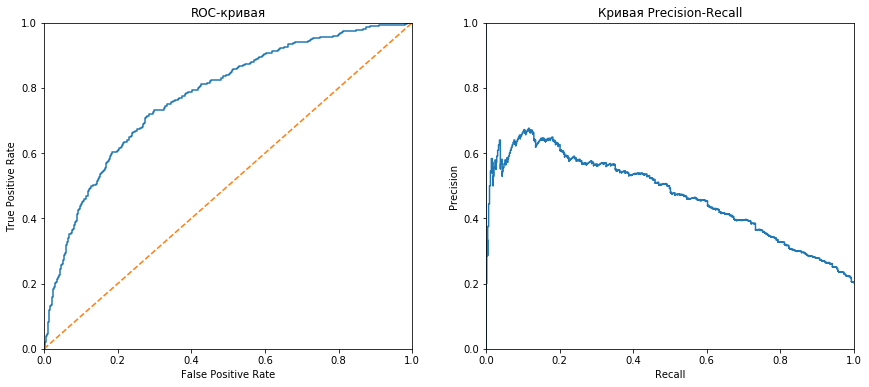

In [30]:
curve_graphs(target_valid, probability_valid_one)

 <div style="border:solid grey 1px; padding: 20px"> 
Лучший f1 (0.508) получилися при пороге в 0.25. Это из-за дисбаланса классификации. Показатели Auc-Roc: 0.775 и  Average precision score: 0.467, не изенлись. Так и должно быть, это метрики модели в целом. Хоть f1 увеличился значительно, но по-прежнему слишком низкий.
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>отлично)

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.2.2  DecisionTreeClassifier</h4>
<a id="tree"></a>
</div>

In [31]:
# в этот раз создадим списки с лучшими показателями, тут уже будет больше параметров
best_probability_valid_one_tree_d = [0] # напрмер, лучшая вероятность класса 1, нужно будет для графиков roc_curve, ведь 
best_predicted_tree_valid = [0] # модели с разными гипермараметрами грулибы (или леса в случае randomforest) это разные модели
best_tree_model = [0]
best_tree_f1 = [0]
best_tree_treshold = [0]
best_tree_precision = [0]
best_tree_recall = [0]
best_tree_depth = [0]
for depth in list(range(1,9)): # перебираем высоту дерева
    model = DecisionTreeClassifier(max_depth = depth, random_state =12345)
    model.fit(features_train, target_train)
    probability_valid = model.predict_proba(features_valid)
    probability_valid_one_tree_d = probability_valid[:,1]
    print()
    for treshold in np.arange(0.1, 0.6, 0.05): # перебирвем трешхолд
        predicted_valid = probability_valid_one_tree_d>treshold
        f1 = f1_score(target_valid, predicted_valid)
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        if f1>best_tree_f1[-1]: # сохраняем модели и показатели с лучшим f1
            best_tree_f1.append(f1)
            best_tree_model.append(model)
            best_tree_treshold.append(treshold)
            best_tree_precision.append(precision)
            best_tree_recall.append(recall)
            best_tree_depth.append(depth)
            best_predicted_tree_valid.append(predicted_valid)
            best_probability_valid_one_tree_d.append(probability_valid_one_tree_d)
        print("Глубина = {}, Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}"\
                  .format(depth, treshold, precision, recall, f1)) 

#ap = average_precision_score(target_valid, best_probability_valid_one_tree_d[-1])
#auc_roc = roc_auc_score(target_valid, best_probability_valid_one_tree_d[-1])
#print()
#print('Лучшие показатели')
#print("Глубина = {:.0f} |Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
#      .format(best_tree_depth[-1] ,best_tree_treshold[-1], best_tree_precision[-1], best_tree_recall[-1], best_tree_f1[-1]))

#print()
#print('Общие показатели модели')
#print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))
# После запуска кода будет некоторое полотно, лучшие показатели в конце, дальше буду разделять лучшие показатели отдельно


Глубина = 1, Порог = 0.10 | Точность = 0.203, Полнота = 1.000, f1_score = 0.338
Глубина = 1, Порог = 0.15 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.20 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.25 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.30 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.35 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.40 | Точность = 0.442, Полнота = 0.587, f1_score = 0.504
Глубина = 1, Порог = 0.45 | Точность = 0.000, Полнота = 0.000, f1_score = 0.000
Глубина = 1, Порог = 0.50 | Точность = 0.000, Полнота = 0.000, f1_score = 0.000
Глубина = 1, Порог = 0.55 | Точность = 0.000, Полнота = 0.000, f1_score = 0.000

Глубина = 2, Порог = 0.10 | Точность = 0.203, Полнота = 1.000, f1_score = 0.338
Глубина = 2, Порог = 0.15 | Точность = 0.463, Полнота = 0.649, f1_score = 0.540
Глубина = 2, Порог = 0.20 | Точность =

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Глубина = 3, Порог = 0.35 | Точность = 0.656, Полнота = 0.450, f1_score = 0.534
Глубина = 3, Порог = 0.40 | Точность = 0.656, Полнота = 0.450, f1_score = 0.534
Глубина = 3, Порог = 0.45 | Точность = 0.656, Полнота = 0.450, f1_score = 0.534
Глубина = 3, Порог = 0.50 | Точность = 0.794, Полнота = 0.265, f1_score = 0.398
Глубина = 3, Порог = 0.55 | Точность = 0.806, Полнота = 0.256, f1_score = 0.388

Глубина = 4, Порог = 0.10 | Точность = 0.292, Полнота = 0.904, f1_score = 0.442
Глубина = 4, Порог = 0.15 | Точность = 0.473, Полнота = 0.725, f1_score = 0.572
Глубина = 4, Порог = 0.20 | Точность = 0.473, Полнота = 0.725, f1_score = 0.572
Глубина = 4, Порог = 0.25 | Точность = 0.473, Полнота = 0.720, f1_score = 0.571
Глубина = 4, Порог = 0.30 | Точность = 0.582, Полнота = 0.555, f1_score = 0.569
Глубина = 4, Порог = 0.35 | Точность = 0.736, Полнота = 0.391, f1_score = 0.510
Глубина = 4, Порог = 0.40 | Точность = 0.736, Полнота = 0.391, f1_score = 0.510
Глубина = 4, Порог = 0.45 | Точность = 

In [32]:
ap = average_precision_score(target_valid, best_probability_valid_one_tree_d[-1]) #Посчитаем показатели модели 
auc_roc = roc_auc_score(target_valid, best_probability_valid_one_tree_d[-1])

print('Лучшие показатели модели')
print("Глубина = {:.0f} |Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_tree_depth[-1] ,best_tree_treshold[-1], best_tree_precision[-1], best_tree_recall[-1], best_tree_f1[-1]))

print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))

Лучшие показатели модели
Глубина = 6 |Порог = 0.30 | Точность = 0.558, Полнота = 0.681, f1_score = 0.614, 

Общие показатели модели
Auc-Roc: 0.844, Average precision score: 0.633


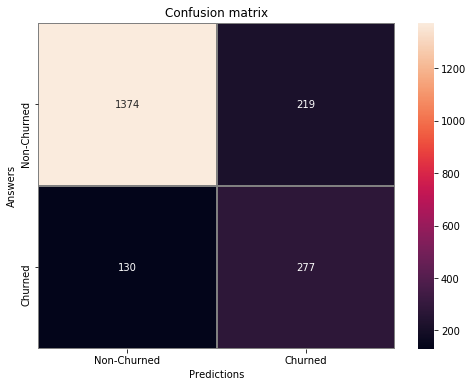

In [33]:
conf_mat(target_valid, best_predicted_tree_valid[-1], ['Non-Churned', 'Churned'])

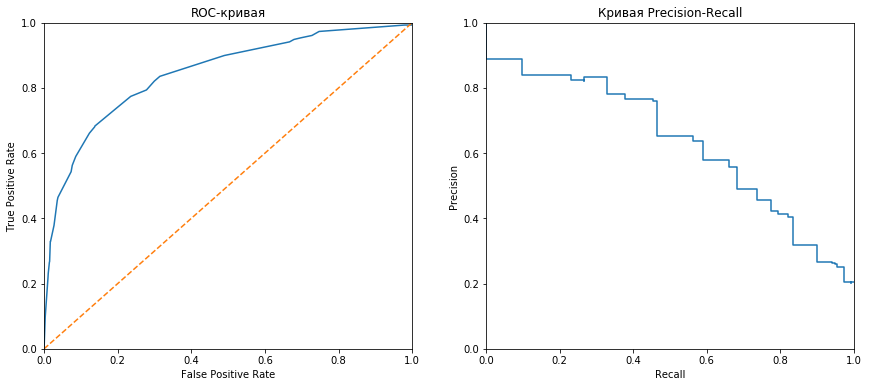

In [34]:
curve_graphs(target_valid, best_probability_valid_one_tree_d[-1])

 <div style="border:solid grey 1px; padding: 20px"> 
Решающее дерево дает лучшие результаты, чем логистическая регрессия. Если оставить трешхолд по умолчанию 0.5, то лучшей моделью будет дерево с глубиной 8 и F1 0.588. Но перебор дает нам результаты лучше: F1 - 0.614, при глубине 6 и трешхолде 0.3
    нужно отметить и существенный рост Auc-Roc до 0.844 и рост Average precision score до 0.633. Значит модель и сама по себе лучше логистической регрессии

</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.2.3  RandomForestClassifier</h4>
<a id="forest"></a>
</div>

In [35]:
best_forest_model = [0] #создали списки с лучшими показателями
best_forest_estimator = [0]
best_forest_depth = [0]
best_forest_treshold = [0]
best_forest_f1 = [0]
best_forest_precision = [0]
best_forest_recall = [0]

best_forest_probability_valid_one_forest = [0]
best_forest_predicted_valid = [0]

for estimator in list(range(1, 100, 10)):  #перебираем количество деревьев
#    print()
    for depth in list(range(1,10)): #переберираем высоту деревьев
        model = RandomForestClassifier(n_estimators = estimator, max_depth = depth, random_state = 12345)
        model.fit(features_train, target_train)
        probability_valid_forest = model.predict_proba(features_valid)
        probability_valid_one_forest = probability_valid_forest[:,1]
#        print()
        for treshold in np.arange(0.1, 0.6, 0.05):  # переберираем трешхолы
            predicted_valid = probability_valid_one_forest>treshold
            f1 = f1_score(target_valid, predicted_valid)
            precision = precision_score(target_valid, predicted_valid)
            recall = recall_score(target_valid, predicted_valid)
            if f1>best_forest_f1[-1]: # сохраняем лучшие показатели и модели
                best_forest_model.append(model)
                best_forest_estimator.append(estimator)
                best_forest_depth.append(depth)
                best_forest_treshold.append(treshold)
                best_forest_f1.append(f1)
                best_forest_precision.append(precision)
                best_forest_recall.append(recall)
                best_forest_probability_valid_one_forest.append(probability_valid_one_forest)
                best_forest_predicted_valid.append(predicted_valid)
#            print("Деревья = {} | Глубина = {} | Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}"\
#                  .format(estimator, depth, treshold, precision, recall, f1))


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F

In [36]:
ap = average_precision_score(target_valid, best_forest_probability_valid_one_forest[-1])
auc_roc = roc_auc_score(target_valid, best_forest_probability_valid_one_forest[-1])

print('Лучшие показатели')
print("Деревья = {} | Глубина = {:.0f} |Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_forest_estimator[-1] ,best_forest_depth[-1] ,best_forest_treshold[-1], best_forest_precision[-1],\
              best_forest_recall[-1], best_forest_f1[-1]))

print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))  

Лучшие показатели
Деревья = 81 | Глубина = 8 |Порог = 0.30 | Точность = 0.659, Полнота = 0.646, f1_score = 0.653, 

Общие показатели модели
Auc-Roc: 0.871, Average precision score: 0.709


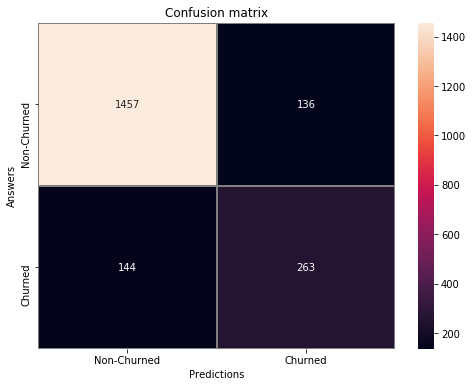

In [37]:
conf_mat(target_valid, best_forest_predicted_valid[-1], ['Non-Churned', 'Churned'])

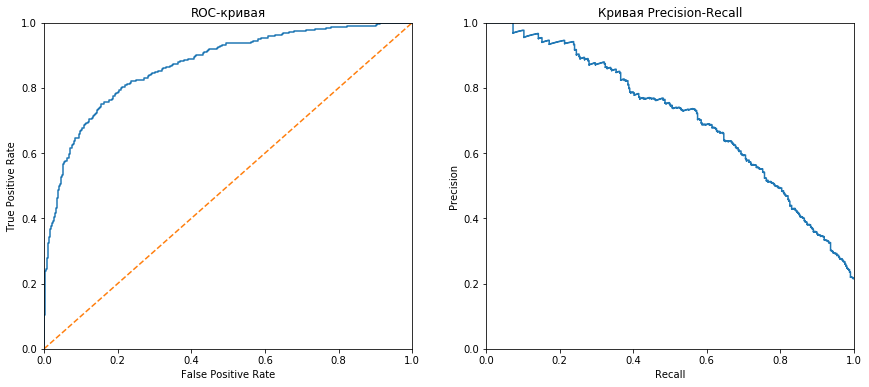

In [38]:
curve_graphs(target_valid, best_forest_probability_valid_one_forest[-1])

 <div style="border:solid grey 1px; padding: 20px"> 
Случайны лес показывает еще лучшие результаты. Модель с 81 деревом, глубиной 8 дает и порогом 0.3 показывает f1_score 0.653. При этом общие показатели модели также растут Auc-Roc до 0.871 и рост Average precision score до 0.709. Значит модель и сама по себе лучше решающего дерева и логистической регрессии.

</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h3 style="color:blue;margin-bottom:10px">Шаг 2.3  Обучение c учетом дисбаланса</h3>
<a id="balanced"></a>
</div>

 <div style="border:solid grey 1px; padding: 20px"> 
Для балансировки классов будем  во всех использованных раннее моделях использовать параметр class_weight='balanced'
Это вариант видится наиболее приемлемым с точки зрения как трудозатрат так и с практической, т.к. он исходя из количества кажого класса максимально их уровняет
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.3.1  LogisticRegression</h4>
<a id="regressoin_b"></a>
</div>

In [39]:
#подробно комметриями не буду расписывать каждое действие, обучешие моделей происходи аналогично с предыдущим пунктом.
model = LogisticRegression(random_state = 12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Полнота:{:.3f}'.format(recall_score(target_valid, predicted_valid)))
print('Точность:{:.3f}'.format(precision_score(target_valid, predicted_valid)))
print('f1_score:{:.3f}'.format(f1_score(target_valid, predicted_valid)))


probability_valid = model.predict_proba(features_valid)
probability_valid_one = probability_valid[:,1]
ap = average_precision_score(target_valid, probability_valid_one)
auc_roc = roc_auc_score(target_valid, probability_valid_one)
print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))
print('Медианная вероятность класса 1: {:.3f}'.format(np.median(probability_valid_one)))

Полнота:0.730
Точность:0.387
f1_score:0.506

Общие показатели модели
Auc-Roc: 0.781, Average precision score: 0.458
Медианная вероятность класса 1: 0.429


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


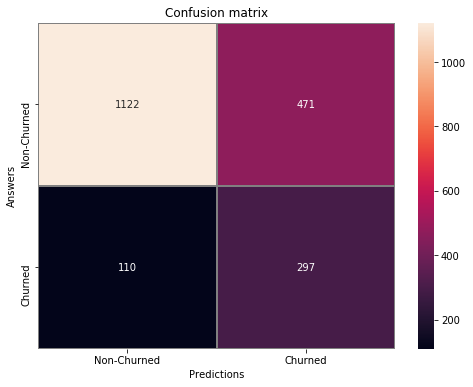

In [40]:
conf_mat(target_valid, predicted_valid, ['Non-Churned', 'Churned'])

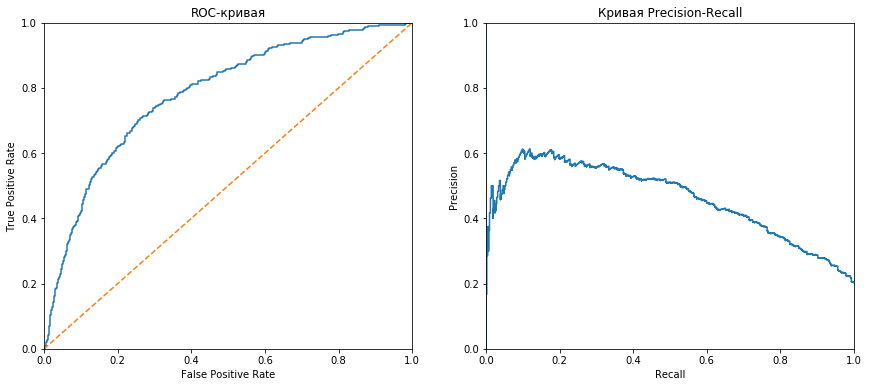

In [41]:
curve_graphs(target_valid, probability_valid_one)

 <div style="border:solid grey 1px; padding: 20px"> 
Обучили модель логистической регрессии, без перебора трешхолда. Результаты лучше чем без балансировки, f1 - 0.516. Медиана вероятностей  класса 1 - 42%, нужно перебирать вероятности где-то в этом диапазоне для улучшения модели. ПоказательAuc-Roc: 0.781, Average precision score: 0.458, тоже невысокие
</div>

In [42]:
best_predicted_valid = 0
best_f1 = 0
best_precision = 0
best_recall = 0
best_threshold = 0
for threshold in np.arange(0.2, 0.8, 0.05):
    predicted_valid = probability_valid_one>threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_predicted_valid = predicted_valid
        best_f1 = f1
        best_precision = precision
        best_recall = recall
        best_threshold = threshold
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}".format(threshold, precision, recall, f1))
ap = average_precision_score(target_valid, probability_valid_one)
auc_roc = roc_auc_score(target_valid, probability_valid_one)
print()
print('Лучшие показатели')
print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_threshold, best_precision, recall, best_f1))
print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))

Порог = 0.20 | Точность = 0.230, Полнота = 0.978, f1_score = 0.372
Порог = 0.25 | Точность = 0.251, Полнота = 0.956, f1_score = 0.398
Порог = 0.30 | Точность = 0.271, Полнота = 0.931, f1_score = 0.419
Порог = 0.35 | Точность = 0.290, Полнота = 0.882, f1_score = 0.437
Порог = 0.40 | Точность = 0.317, Полнота = 0.835, f1_score = 0.460
Порог = 0.45 | Точность = 0.348, Полнота = 0.791, f1_score = 0.483
Порог = 0.50 | Точность = 0.387, Полнота = 0.730, f1_score = 0.506
Порог = 0.55 | Точность = 0.422, Полнота = 0.663, f1_score = 0.516
Порог = 0.60 | Точность = 0.460, Полнота = 0.582, f1_score = 0.514
Порог = 0.65 | Точность = 0.516, Полнота = 0.474, f1_score = 0.494
Порог = 0.70 | Точность = 0.536, Полнота = 0.381, f1_score = 0.445
Порог = 0.75 | Точность = 0.562, Полнота = 0.278, f1_score = 0.372
Порог = 0.80 | Точность = 0.585, Полнота = 0.187, f1_score = 0.283

Лучшие показатели
Порог = 0.55 | Точность = 0.422, Полнота = 0.187, f1_score = 0.516, 

Общие показатели модели
Auc-Roc: 0.781, 

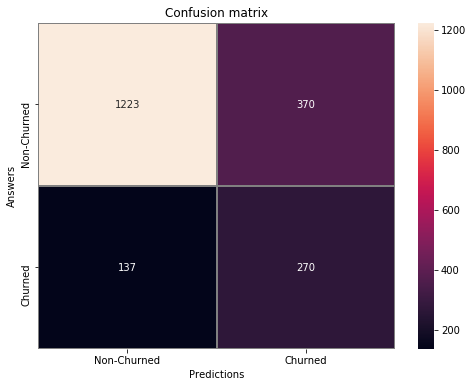

In [43]:
conf_mat(target_valid, best_predicted_valid, ['Non-Churned', 'Churned'])

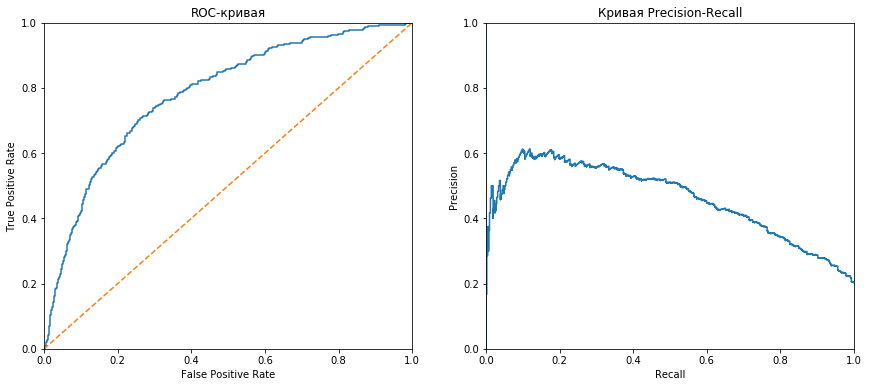

In [44]:
curve_graphs(target_valid, probability_valid_one)

<div style="border:solid grey 1px; padding: 20px"> 
Лучший f1 (0.516) получилися при пороге в 0.55. Показатели Auc-Roc: 0.775 и  Average precision score: 0.467, не изенлись. Так и должно быть, это метрики модели в целом. Хоть f1 увеличился значительно, но по-прежнему слишком низкий. Auc-Roc: 0.781, Average precision score: 0.458.
</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.3.2  DecisionTreeClassifier</h4>
<a id="tree_b"></a>
</div>

In [45]:
best_probability_valid_one_tree_d = [0]
best_predicted_tree_valid = [0]
best_tree_model = [0]
best_tree_f1 = [0]
best_tree_treshold = [0]
best_tree_precision = [0]
best_tree_recall = [0]
best_tree_depth = [0]
for depth in list(range(1,9)):
    model = DecisionTreeClassifier(max_depth = depth, random_state =12345, class_weight='balanced')
    model.fit(features_train, target_train)
    probability_valid = model.predict_proba(features_valid)
    probability_valid_one_tree_d = probability_valid[:,1]
    print()
    for treshold in np.arange(0.2, 0.8, 0.05):
        predicted_valid = probability_valid_one_tree_d>treshold
        f1 = f1_score(target_valid, predicted_valid)
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        if f1>best_tree_f1[-1]:
            best_tree_f1.append(f1)
            best_tree_model.append(model)
            best_tree_treshold.append(treshold)
            best_tree_precision.append(precision)
            best_tree_recall.append(recall)
            best_tree_depth.append(depth)
            best_predicted_tree_valid.append(predicted_valid)
            best_probability_valid_one_tree_d.append(probability_valid_one_tree_d)
        print("Глубина = {}, Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}"\
                  .format(depth, treshold, precision, recall, f1))


Глубина = 1, Порог = 0.20 | Точность = 0.203, Полнота = 1.000, f1_score = 0.338
Глубина = 1, Порог = 0.25 | Точность = 0.203, Полнота = 1.000, f1_score = 0.338
Глубина = 1, Порог = 0.30 | Точность = 0.203, Полнота = 1.000, f1_score = 0.338
Глубина = 1, Порог = 0.35 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.40 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.45 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.50 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.55 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.60 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.65 | Точность = 0.361, Полнота = 0.735, f1_score = 0.484
Глубина = 1, Порог = 0.70 | Точность = 0.000, Полнота = 0.000, f1_score = 0.000
Глубина = 1, Порог = 0.75 | Точность = 0.000, Полнота = 0.000, f1_score = 0.000
Глубина = 1, Порог = 0.80 | Точность = 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Глубина = 3, Порог = 0.20 | Точность = 0.272, Полнота = 0.929, f1_score = 0.420
Глубина = 3, Порог = 0.25 | Точность = 0.272, Полнота = 0.929, f1_score = 0.420
Глубина = 3, Порог = 0.30 | Точность = 0.272, Полнота = 0.929, f1_score = 0.420
Глубина = 3, Порог = 0.35 | Точность = 0.272, Полнота = 0.929, f1_score = 0.420
Глубина = 3, Порог = 0.40 | Точность = 0.272, Полнота = 0.929, f1_score = 0.420
Глубина = 3, Порог = 0.45 | Точность = 0.371, Полнота = 0.774, f1_score = 0.502
Глубина = 3, Порог = 0.50 | Точность = 0.514, Полнота = 0.533, f1_score = 0.524
Глубина = 3, Порог = 0.55 | Точность = 0.514, Полнота = 0.533, f1_score = 0.524
Глубина = 3, Порог = 0.60 | Точность = 0.514, Полнота = 0.533, f1_score = 0.524
Глубина = 3, Порог = 0.65 | Точность = 0.514, Полнота = 0.533, f1_score = 0.524
Глубина = 3, Порог = 0.70 | Точность = 0.763, Полнота = 0.324, f1_score = 0.455
Глубина = 3, Порог = 0.75 | Точность = 0.763, Полнота = 0.324, f1_score = 0.455
Глубина = 3, Порог = 0.80 | Точность = 

In [46]:
ap = average_precision_score(target_valid, best_probability_valid_one_tree_d[-1])
auc_roc = roc_auc_score(target_valid, best_probability_valid_one_tree_d[-1])
print()
print('Лучшие показатели')
print("Глубина = {:.0f} |Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_tree_depth[-1] ,best_tree_treshold[-1], best_tree_precision[-1], best_tree_recall[-1], best_tree_f1[-1]))

print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))


Лучшие показатели
Глубина = 6 |Порог = 0.70 | Точность = 0.590, Полнота = 0.604, f1_score = 0.597, 

Общие показатели модели
Auc-Roc: 0.836, Average precision score: 0.616


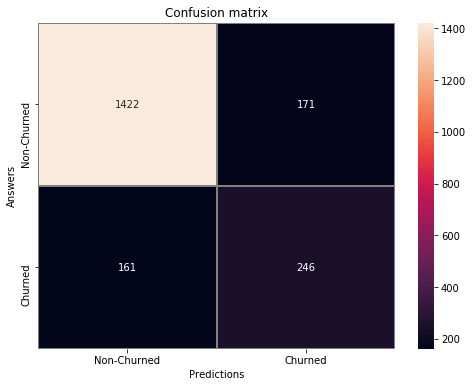

In [47]:
conf_mat(target_valid, best_predicted_tree_valid[-1], ['Non-Churned', 'Churned'])

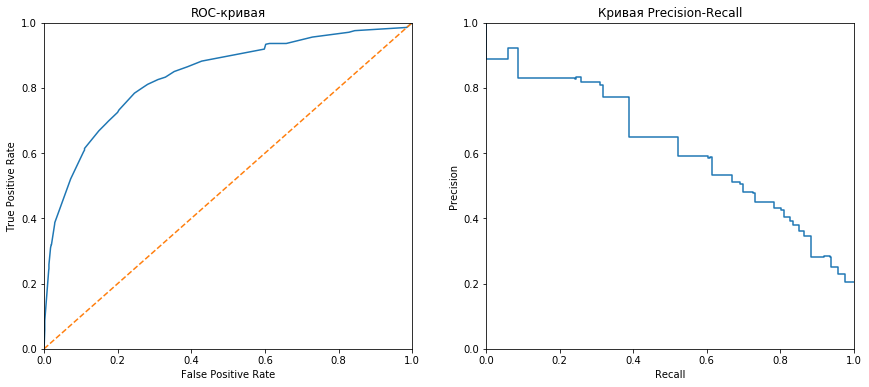

In [48]:
curve_graphs(target_valid, best_probability_valid_one_tree_d[-1])

<div style="border:solid grey 1px; padding: 20px"> 
Решающее дерево опять дает лучшие результаты, чем логистическая регрессия, но хуже чем до балансировки.Это странно, это единственная такая модель у нас. 
    Если оставить трешхолд по умолчанию 0.5, то лучшей моделью будет дерево с глубиной 6 и F1 0.571. Но перебор дает нам результаты лучше: F1 - 0.597, при глубине 6 и трешхолде 0.7. До балансировки F1 был равен 0.614
    Такие показател как  Auc-Roc (0.836) или Average precision score до 0.616 тоже немного сократились. 

</div>

<div style="border:solid blue 2px; padding: 20px"> 
<h4 style="color:blue;margin-bottom:10px">Шаг 2.3.3  RandomForestClassifier</h4>
<a id="forest_b"></a>
</div>

In [49]:
# тут отрабатывает немного дольше чем на остальных

best_forest_model = [0]
best_forest_estimator = [0]
best_forest_depth = [0]
best_forest_treshold = [0]
best_forest_f1 = [0]
best_forest_precision = [0]
best_forest_recall = [0]

best_forest_probability_valid_one_forest = [0]
best_forest_predicted_valid = [0]

for estimator in list(range(1, 100, 5)):
#    print()
    for depth in list(range(1,10)):
        model = RandomForestClassifier(n_estimators = estimator, max_depth = depth, random_state = 12345, class_weight='balanced')
        model.fit(features_train, target_train)
        probability_valid_forest = model.predict_proba(features_valid)
        probability_valid_one_forest = probability_valid_forest[:,1]
#        print()
        for treshold in np.arange(0.2, 0.8, 0.025):
            predicted_valid = probability_valid_one_forest>treshold
            f1 = f1_score(target_valid, predicted_valid)
            precision = precision_score(target_valid, predicted_valid)
            recall = recall_score(target_valid, predicted_valid)
            if f1>best_forest_f1[-1]:
                best_forest_model.append(model)
                best_forest_estimator.append(estimator)
                best_forest_depth.append(depth)
                best_forest_treshold.append(treshold)
                best_forest_f1.append(f1)
                best_forest_precision.append(precision)
                best_forest_recall.append(recall)
                best_forest_probability_valid_one_forest.append(probability_valid_one_forest)
                best_forest_predicted_valid.append(predicted_valid)
#            print("Деревья = {} | Глубина = {} | Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}"\
#                  .format(estimator, depth, treshold, precision, recall, f1))


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F

In [50]:
ap = average_precision_score(target_valid, best_forest_probability_valid_one_forest[-1])
auc_roc = roc_auc_score(target_valid, best_forest_probability_valid_one_forest[-1])

print('Лучшие показатели')
print("Деревья = {} | Глубина = {:.0f} |Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}, "\
      .format(best_forest_estimator[-1] ,best_forest_depth[-1] ,best_forest_treshold[-1], best_forest_precision[-1],\
              best_forest_recall[-1], best_forest_f1[-1]))

print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))  

Лучшие показатели
Деревья = 61 | Глубина = 6 |Порог = 0.55 | Точность = 0.625, Полнота = 0.695, f1_score = 0.658, 

Общие показатели модели
Auc-Roc: 0.865, Average precision score: 0.692


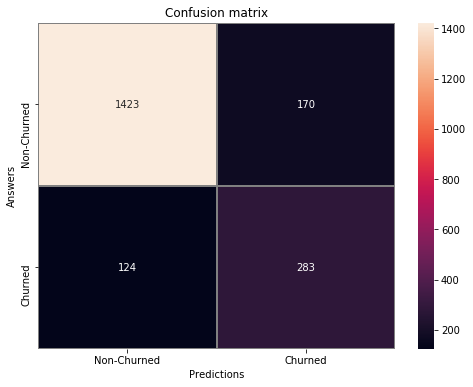

In [51]:
conf_mat(target_valid, best_forest_predicted_valid[-1], ['Non-Churned', 'Churned'])

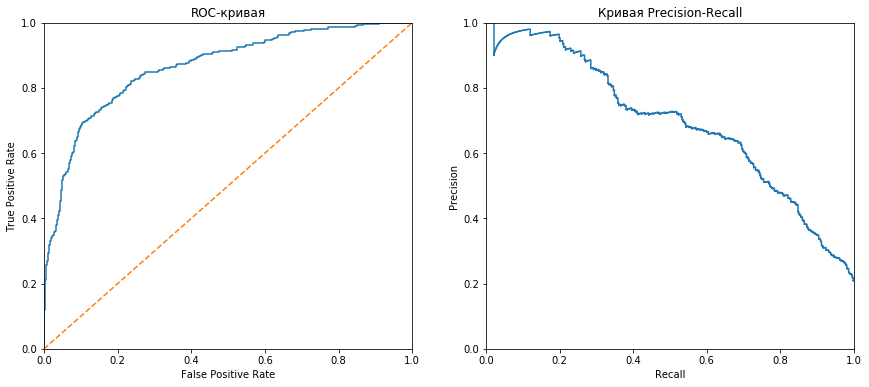

In [52]:
curve_graphs(target_valid, best_forest_probability_valid_one_forest[-1])

 <div style="border:solid grey 1px; padding: 20px"> 
Сбаланированный Случайный лес показывает еще лучшие результаты чем другие сбалансированные модели, хотя и самого себя несбалансированного превосходит по F1 совсем немного. Модель с 76 деревьями, глубиной 8 дает и порогом 0.52 показывает f1_score 0.654. F1 несбалансированного случайного леса был 0.653. Разница небольшая. Показатель Auc-Roc: 0.866 и Average precision score: 0.696, они оба тоже ниже чем в несбалансированной выборке, хоть и не сильно. Наиболее значимы рост показал Recall 0.698.

</div>

 <div style="border:solid grey 1px; padding: 20px"> 
<h3 style="color:grey; margin-bottom:20px">Шаг 2. Вывод </h3>
Мы изучили 8 моделей. Не все модели заметно улучшались после балансировки классов. Сильно это коснулось только логистической регрессии, у которой порог мы брали по умолчанию 0.5, на остальные модели балансировка влияла, но не сильно.Скорее всего, это связано с тем, что в той или иной степени корректировка порога и балансировка классов нацелены на одно и то же. Когда бы подбирали порог в моделях мы по сути невелировали перекомы созданные несбалансированными классами. Так на решающем дереве F1 у нас совсем не прирос после балансировки, а в случайном лесе вырос, но только на одну тысяную, хотя по сути при прочих равных очень хорошо приросла полнота (0.698), это с большим запасом лучшая полнота во всех моделях при сравнимых остальных показателях. 
    
Целевой показатель F1 получился наилучшим в моделе сбалансированного случайного леса (0.654). Соответственно на этой моделе и будем делать тест.

Ниже предствлена таблица с основными показателями лучших моделей.
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>отличная работа.

In [53]:
#Таблица с результатами лучших моделей каждого типа

best_models = pd.DataFrame({
                   "Model": ['LogisticRegression_disbalanced', 'LogisticRegression_disbalanced',
                            'DecisionTreeClassifier_disbalanced', 'RandomForestClassifier_disbalanced',
                            'LogisticRegression_balanced', 'LogisticRegression_balanced',
                            'DecisionTreeClassifier_balanced', 'RandomForestClassifier_balanced'],
                   "Estimator": [0,0, 0, 81, 0, 0, 0, 76],
                   "Depth": [0, 0, 6, 8, 0, 0, 6, 8, ],
                   "Treshold": [0.5, 0.25, 0.3, 0.3, 0.5, 0.55, 0.7, 0.52],
                   "F1": [0.299, 0.508, 0.614, 0.653, 0.506, 0.516, 0.597, 0.654],
                   "Recall": [0.197, 0.634, 0.681, 0.646, 0.730, 0.187, 0.604, 0.698],
                   "Precision": [0.625, 0.424, 0.558, 0.659, 0.387, 0.422,  0.590, 0.616],
                   "Auc_roc": [0.775, 0.775, 0.844, 0.871, 0.781, 0.781, 0.836, 0.866],
                   "AP": [0.467, 0.467, 0.633, 0.709, 0.458, 0.458, 0.616, 0.696]
                                                     })
best_models

,Model,Estimator,Depth,Treshold,F1,Recall,Precision,Auc_roc,AP
0,LogisticRegression_disbalanced,0,0,0.500,0.299,0.197,0.625,0.775,0.467
1,LogisticRegression_disbalanced,0,0,0.250,0.508,0.634,0.424,0.775,0.467
2,DecisionTreeClassifier_disbalanced,0,6,0.300,0.614,0.681,0.558,0.844,0.633
3,RandomForestClassifier_disbalanced,81,8,0.300,0.653,0.646,0.659,0.871,0.709
4,LogisticRegression_balanced,0,0,0.500,0.506,0.730,0.387,0.781,0.458
5,LogisticRegression_balanced,0,0,0.550,0.516,0.187,0.422,0.781,0.458
6,DecisionTreeClassifier_balanced,0,6,0.700,0.597,0.604,0.590,0.836,0.616
7,RandomForestClassifier_balanced,76,8,0.520,0.654,0.698,0.616,0.866,0.696


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>А за этот вывод - пять баллов)

<div style="border:solid blue 2px; padding: 20px"> 
<h1 style="color:blue; margin-bottom:20px">Шаг 3. Финальное тестирование</h1>
<a id="tests"></a>
</div>

In [54]:
model = best_forest_model[-1]
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

f1 = f1_score(target_test, predicted_test)
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)


print('Полнота:{:.3f}'.format(recall))
print('Точность:{:.3f}'.format(precision))
print('f1_score:{:.3f}'.format(f1))



Полнота:0.737
Точность:0.530
f1_score:0.617


In [55]:
model = best_forest_model[-1]
model.fit(features_train, target_train)
forest_balanced_probalities = model.predict_proba(features_test)
forest_balanced_probalities_one = forest_balanced_probalities[:,1]
for treshold in np.arange(0.3, 0.8, 0.05):
    predicted_test=forest_balanced_probalities_one>treshold
    f1 = f1_score(target_test, predicted_test)
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test)    
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, f1_score = {:.3f}"\
                  .format(treshold, precision, recall, f1))

Порог = 0.30 | Точность = 0.299, Полнота = 0.948, f1_score = 0.455
Порог = 0.35 | Точность = 0.362, Полнота = 0.894, f1_score = 0.515
Порог = 0.40 | Точность = 0.418, Полнота = 0.853, f1_score = 0.561
Порог = 0.45 | Точность = 0.487, Полнота = 0.803, f1_score = 0.606
Порог = 0.50 | Точность = 0.530, Полнота = 0.737, f1_score = 0.617
Порог = 0.55 | Точность = 0.592, Полнота = 0.673, f1_score = 0.630
Порог = 0.60 | Точность = 0.672, Полнота = 0.600, f1_score = 0.634
Порог = 0.65 | Точность = 0.742, Полнота = 0.509, f1_score = 0.603
Порог = 0.70 | Точность = 0.779, Полнота = 0.432, f1_score = 0.556
Порог = 0.75 | Точность = 0.830, Полнота = 0.349, f1_score = 0.491


In [56]:
ap = average_precision_score(target_test, forest_balanced_probalities_one)
auc_roc = roc_auc_score(target_test, forest_balanced_probalities_one)
print()
print('Общие показатели модели')
print('Auc-Roc: {:.3f}, Average precision score: {:.3f}'.format(auc_roc, ap))


Общие показатели модели
Auc-Roc: 0.869, Average precision score: 0.694


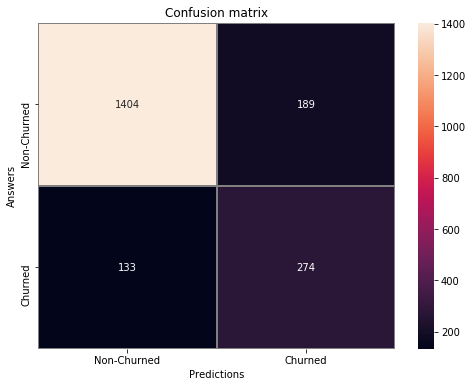

In [57]:
conf_mat(target_test, forest_balanced_probalities_one>0.55, ['Non-Churned', 'Churned'])

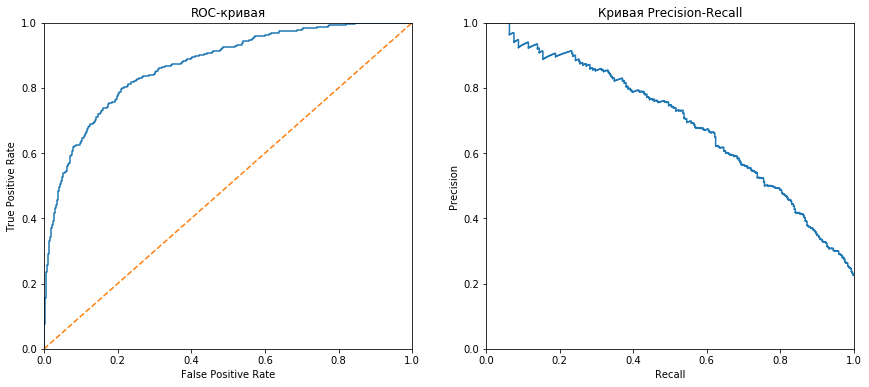

In [58]:
curve_graphs(target_test, forest_balanced_probalities_one)

<div style="border:solid grey 1px; padding: 20px"> 
<h3 style="color:grey; margin-bottom:20px">Шаг 3. Вывод </h3>
Протестировали лучшую модель - это был RandomForestClassifier, сбалансированный, глубина 8, количство деревьев 76. При порогу по умолчанию (0.5) F1 модели составляет 0.626, но после корректировки порогов, то при изменини порога до 0.55, F1 повышается до 0.636. Это присходит из-за того что мы снижаем полноту примерно на 0.6, но зато примерно на аналогичное значение повышаем точность.

Показател Auc-Roc: 0.871, Average precision score: 0.693. В целом показатели на тестовой выборке сравнимы с показателями на валидационной, что довольно хорошо для модели.
    
</div>

In [59]:
#Таблица с результатами лучших моделей каждого типа

best_models = pd.DataFrame({
                   "Model": ['RandomForestClassifier_balanced',
                            'RandomForestClassifier_test'],
                   "Estimator": [76, 76],
                   "Depth": [8, 8],
                   "Treshold": [0.52, 0.55],
                   "F1": [0.654, 0.636],
                   "Recall": [0.698, 0.646],
                   "Precision": [0.616, 0.626],
                   "Auc_roc": [0.866, 0.871],
                   "AP": [0.696, 0.693]
                                                     })
best_models

,Model,Estimator,Depth,Treshold,F1,Recall,Precision,Auc_roc,AP
0,RandomForestClassifier_balanced,76,8,0.520,0.654,0.698,0.616,0.866,0.696
1,RandomForestClassifier_test,76,8,0.550,0.636,0.646,0.626,0.871,0.693


<div style="border:solid blue 2px; padding: 20px"> 
<h1 style="color:blue; margin-bottom:20px">Шаг 4. Выод</h1>
В рамках проекта мы получили датасет с 10 000 наблюдений. Целевым  признаком ялвется Exited, он обозначает ушел клиент или нет.
Целевой показатель почти не демонстировал взаимосвязви с другими признаками, так наиболее сильная связь наблюдается с возрастом клиент,небольшая с балансом и параметром активности клиента.
У некоторых признаков наблюдается довольно странное распределение, так зарплаты клиентов распределены так, чтокаждый уровень зарплат получает одинаковое количество человек.
    
При разделении данных на тренировочную, валидационную и тестову выборки датасет был разделен в пропорции 60%-20%-20%, данные стратифицировали, чтобы классы распределились по выборкам в одинаковой проипорции. Также применили метод One-Hot Encoding для категориальных признаков, которые были записаны словамию 

Классы в выобрке распределены следующим образом: класс 1-20.4%, класс 2 - 79,6% , это явный дисбаланс классов
Далее мы стандартизировали признаки и обучили модели без учета дисбаланса классов. Лучшей моделью стал RandomForestClassifier с F1 равным 0.653 и порогом 0.3

Далее произвели балансировку классов с помощью параметра class_weight='balanced'

После балансирвки лучше моделью себя опять показала модель RandomForestClassifier_balanced с F1 равным 0.654 и порогом 0.55

При финальном тестировании сбалансированной модели RandomForestClassifier F1 0.636 при пороге 0.55. Точность прогноза составляет 0.626, а полнота 0.646. Показатель Auc-Roc: 0.871, Average precision score: 0.693

<a id="conclusion"></a>
</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'><br>
<br/>Филипп, добротная и качественная работа! <br>
Подготовка данных, разносторонняя работа с диссбалансом и исследование моделей и поиск парамтров для них - ничего не забыто <br>
И видно, что проделана рабочая аналитическая работа: результативно и с выводами и  графически анализом.<br>  

<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не использовать кросс-валидации)<br>
    
2) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.<br>
    
3) Классно, что используешь понятия точности и полноты. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" <br>
<br><br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!
    
и С НАСТУПАЮЩИМ НОВЫМ ГОДОМ!<br>
Пусть в нём будут у тебя 2021% -ые дивиденды от обучения в нашей школе!